# Tarea 4

Jairo Saul Diaz Soto

Dr. Thomas Batard

Vision Computacional I

2024 / 03 / 18

# Ejercicio 1: Propiedades del operador convolucion

Se tiene que la convolucion de dos funcions $f$ y $g$ es
$$
    (f * g)(x) = \int_{- \infty}^{\infty} f(\eta)g(x - \eta)d \eta
$$
Y ses propone la transoformacion de Fourier de una funcion $f$ como
$$
    F(f(u)) = \int_{\mathbb{R}}f(x) e^{-2i \pi xu}dx
$$
Entonces la transformada de Fourier de la convolucion de las funciones $f,g$ seria lo siguiente
$$
    F((f * g)(u)) = \int_{- \infty}^{\infty} \int_{- \infty}^{\infty} f(\eta)g(x - \eta)d \eta e^{-2i \pi xu}dx
$$
Es posible reescribir la expresion anterior tal que
$$
    F((f * g)(u)) = \int_{- \infty}^{\infty}  \left[ \int_{- \infty}^{\infty}g(x - \eta) e^{-2i \pi xu}dx  \right ] f(\eta) d \eta
$$
Donde la expresion que se encuentra entre brackets, es la transformada de Fourier con una traslacion que se puede expresar como
$$
    F((f * g)(u)) = \int_{- \infty}^{\infty}  F(g) e^{-2i \pi \eta u}  f(\eta) d \eta
$$
Lo cual resulta en lo siguiente
$$
   F(g) \int_{- \infty}^{\infty}   e^{-2i \pi \eta u}  f(\eta) d \eta = F(g) \cdot F(f)
$$
Entonces
$$
   F((f * g)(u)) =  F(f) \cdot F(g)
$$

# Ejercicio 2: Removiendo ruido con filtro de la mediana

## Funcion para imagenes de un solo canal

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
def median_filter_onechannel(img, win_size):
    margin = win_size // 2
    h, w = img.shape
    img_filtered = np.zeros_like(img)
    
    for i in range(margin, h - margin):
        for j in range(margin, w - margin):
            kernel = img[i - margin:i + margin + 1, j - margin:j + margin + 1]
            img_filtered[i, j] = np.median(kernel)
    
    return img_filtered

## Funcion para imagenes con 3 distintos canales

In [7]:
def median_filter_threechannel(img, win_size_ch1, win_size_ch2, win_size_ch3):
    channel1_filtered = median_filter_onechannel(img[:, :, 0], win_size_ch1)
    channel2_filtered = median_filter_onechannel(img[:, :, 1], win_size_ch2)
    channel3_filtered = median_filter_onechannel(img[:, :, 2], win_size_ch3)
    # Combinar los canales filtrados en una sola imagen
    img_filtered = np.stack((channel1_filtered, channel2_filtered, channel3_filtered), axis=-1)
    
    return img_filtered

## Aplicando el metodo

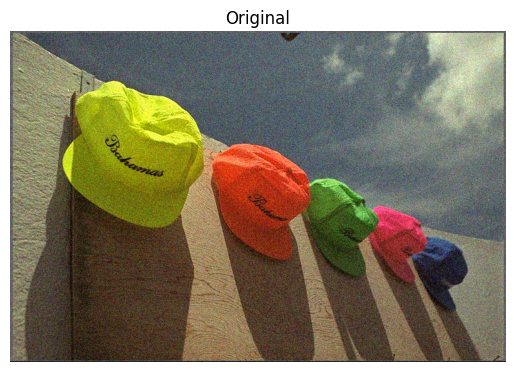

In [26]:
img_bgr = cv2.imread("noisy_img1.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img0_rgb)
plt.title("Original")
plt.axis('off')  # Para desactivar los ejes
plt.show()
img_hsl = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HLS)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2Lab)

In [34]:
sz1 = 3
sz2 = 3
sz3 = 3
img_bgr_fil = median_filter_threechannel(img_bgr, sz1, sz2, sz3)
img_hsl_fil = median_filter_threechannel(img_hsl, sz1, sz2, sz3)
img_hsv_fil = median_filter_threechannel(img_hsv, sz1, sz2, sz3)
img_lab_fil = median_filter_threechannel(img_lab, sz1, sz2, sz3)
imgs3 = []
imgs3.append(cv2.cvtColor(img_bgr_fil, cv2.COLOR_BGR2RGB))
imgs3.append(cv2.cvtColor(img_hsl_fil, cv2.COLOR_HLS2RGB ))
imgs3.append(cv2.cvtColor(img_hsv_fil, cv2.COLOR_HSV2RGB))
imgs3.append(cv2.cvtColor(img_lab_fil, cv2.COLOR_Lab2RGB))

In [35]:
sz1 = 7
sz2 = 7
sz3 = 7
img_bgr_fil = median_filter_threechannel(img_bgr, sz1, sz2, sz3)
img_hsl_fil = median_filter_threechannel(img_hsl, sz1, sz2, sz3)
img_hsv_fil = median_filter_threechannel(img_hsv, sz1, sz2, sz3)
img_lab_fil = median_filter_threechannel(img_lab, sz1, sz2, sz3)
imgs7 = []
imgs7.append(cv2.cvtColor(img_bgr_fil, cv2.COLOR_BGR2RGB))
imgs7.append(cv2.cvtColor(img_hsl_fil, cv2.COLOR_HLS2RGB ))
imgs7.append(cv2.cvtColor(img_hsv_fil, cv2.COLOR_HSV2RGB))
imgs7.append(cv2.cvtColor(img_lab_fil, cv2.COLOR_Lab2RGB))

In [36]:
sz1 = 15
sz2 = 15
sz3 = 15
img_bgr_fil = median_filter_threechannel(img_bgr, sz1, sz2, sz3)
img_hsl_fil = median_filter_threechannel(img_hsl, sz1, sz2, sz3)
img_hsv_fil = median_filter_threechannel(img_hsv, sz1, sz2, sz3)
img_lab_fil = median_filter_threechannel(img_lab, sz1, sz2, sz3)
imgs15 = []
imgs15.append(cv2.cvtColor(img_bgr_fil, cv2.COLOR_BGR2RGB))
imgs15.append(cv2.cvtColor(img_hsl_fil, cv2.COLOR_HLS2RGB ))
imgs15.append(cv2.cvtColor(img_hsv_fil, cv2.COLOR_HSV2RGB))
imgs15.append(cv2.cvtColor(img_lab_fil, cv2.COLOR_Lab2RGB))

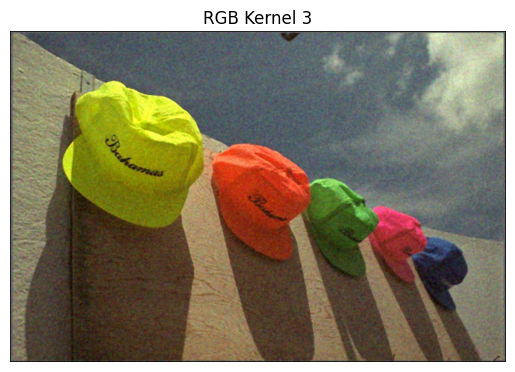

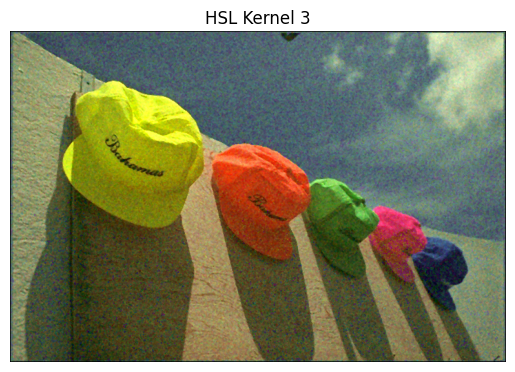

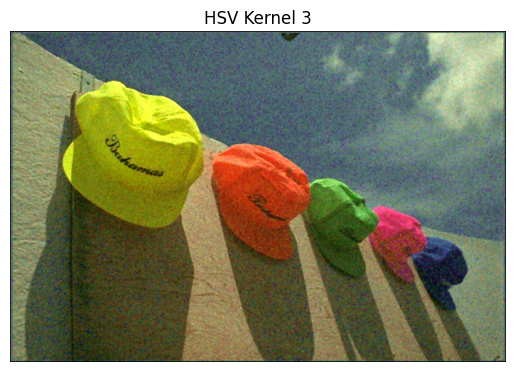

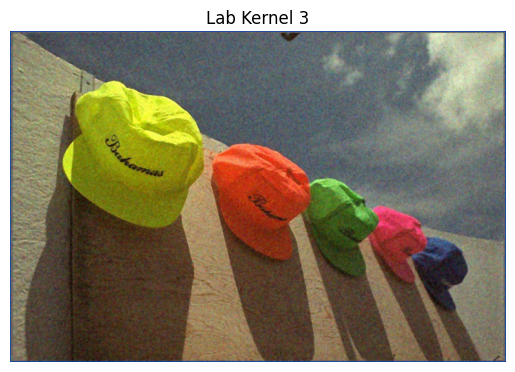

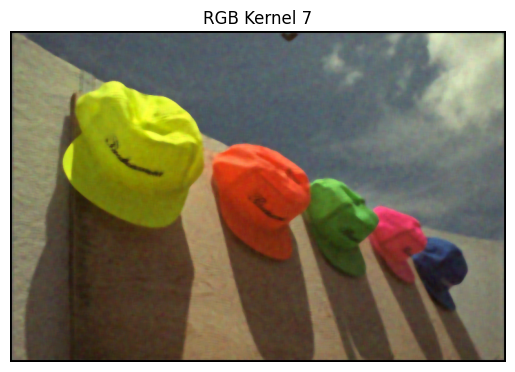

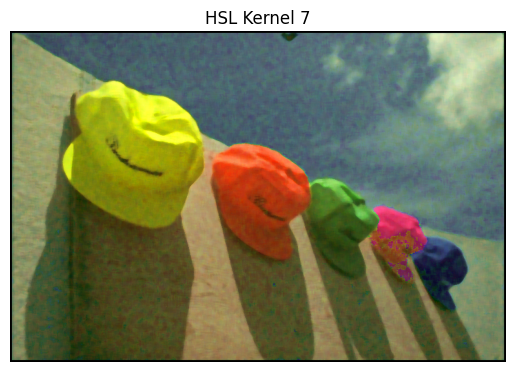

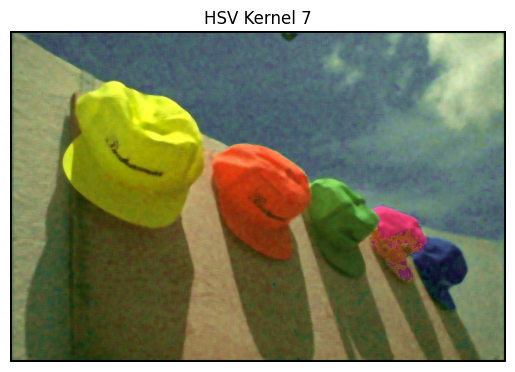

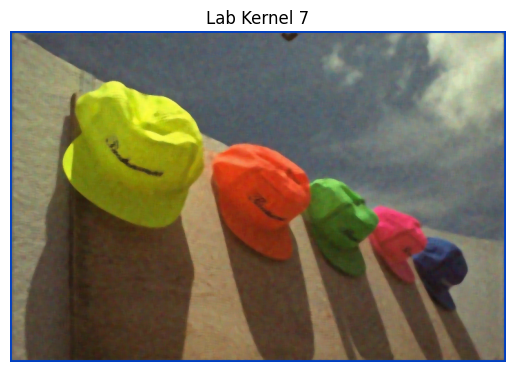

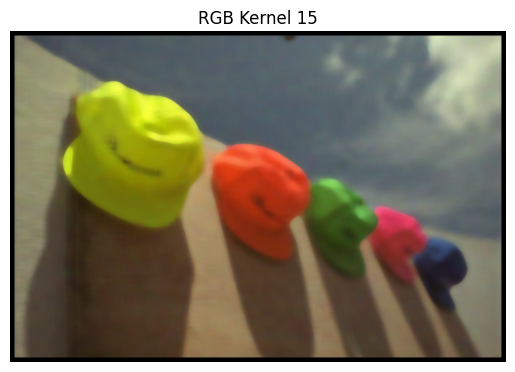

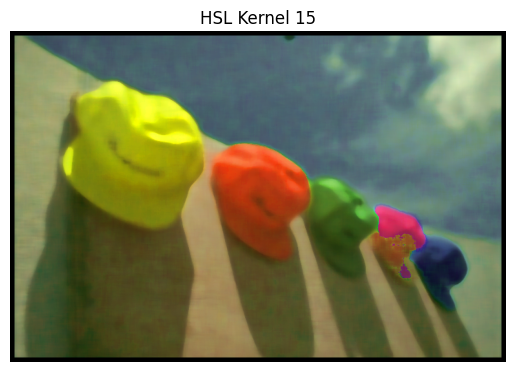

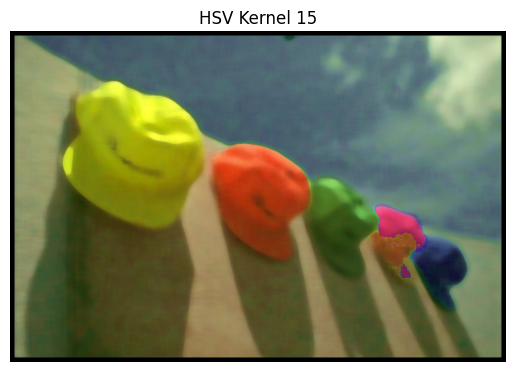

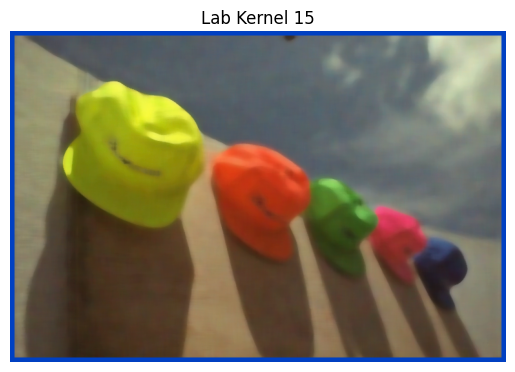

In [43]:
names = ["RGB", "HSL", "HSV", "Lab"]
for img, nm in zip(imgs3, names):
    plt.imshow(img)
    plt.axis("off")
    nm1 = nm + " Kernel 3"
    plt.title(nm1)
    plt.show()

for img, nm in zip(imgs7, names):
    plt.imshow(img)
    plt.axis("off")
    nm1 = nm + " Kernel 7"
    plt.title(nm1)
    plt.show()

for img, nm in zip(imgs15, names):
    plt.imshow(img)
    plt.axis("off")
    nm1 = nm + " Kernel 15"
    plt.title(nm1)
    plt.show()

In [49]:
img_won = cv2.imread("img1.png")
img_won_rgb =  cv2.cvtColor(img_won, cv2.COLOR_BGR2RGB)
print("Valores para imagenes con kernel 3")
for img, nm in zip(imgs3, names):
    print(nm, cv2.PSNR(img_won_rgb, img))

print("Valores para imagenes con kernel 7")
for img, nm in zip(imgs7, names):
    print(nm, cv2.PSNR(img_won_rgb, img))

print("Valores para imagenes con kernel 15")
for img, nm in zip(imgs15, names):
    print(nm, cv2.PSNR(img_won_rgb, img))

Valores para imagenes con kernel 3
RGB 26.70400006783439
HSL 24.19744264491787
HSV 24.336073667418702
Lab 25.992659264630944
Valores para imagenes con kernel 7
RGB 24.297458094903316
HSL 22.766261606907648
HSV 22.922112706823036
Lab 24.579146098249495
Valores para imagenes con kernel 15
RGB 20.481335492084597
HSL 19.763489465597775
HSV 19.854734002479102
Lab 21.216787382856772


## Analizando los resultados

Bien, llegados a este punto, lo primero que se aprecia es que el valor del PSNR disminuye conforme se ahce mas grande el tamanio del kernel, lo cual entonces nos indica que quiza el mejor de estos fue el de tamanio 3.

Tambien se observa que en general, para los 3 tamanios, lo que se aprecia que tanto para HSL y HSV los valores obtenidos son bastante similares, pero son los mas bajos de los que se probarosn, mientras que en el caso de Lab, este mejora su valor de PSNR mientras aumenta el tamanio del kernel en comparacion con el valor de PSNR de la imagen filtrada en RGB, pero en el mejor de los casos que es con kernel de tamanio 3, la imagen con mejor valor de PSNR resulta ser la filtrada en los canales BGR.

# Ejercicio 3: Regulacion de la preservacion de bordes

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [116]:
def gauss_filt(img, ksize, sigma, wcolor):
    margin = ksize // 2
    h, k, channels = img.shape
    simg = np.zeros_like(img, dtype=np.float64)
    for c in range(channels):
        oimg = img[:, :, c]
        for i in range(margin, h-margin):
            for j in range(margin, k-margin):
                #Se establece el kernel
                imin = i - margin
                imax = i + margin
                jmin = j - margin
                jmax = j + margin
                kernel = oimg[imin:imax+1, jmin:jmax+1]
                sum = 0
                for l in range(ksize):
                    for m in range(ksize):
                        d = ((i-imin+l)**2 + (j-jmin+m)**2) * (1 + (wcolor*(kernel[l, m]-kernel[margin+1,margin+1])**2))
                        sum += np.exp(-d/(2*(sigma**2)))*kernel[l, m] / np.sqrt(2*np.pi*(sigma**2))
                simg[i,j,c] = sum
    return simg

In [123]:
img = cv2.imread("img2.png")
img_norm = img.astype(float) / 255.0
img_smt = gauss_filt(img_norm, 5, 10.0, 10.0)

In [124]:
img_dnorm = img_smt * 255

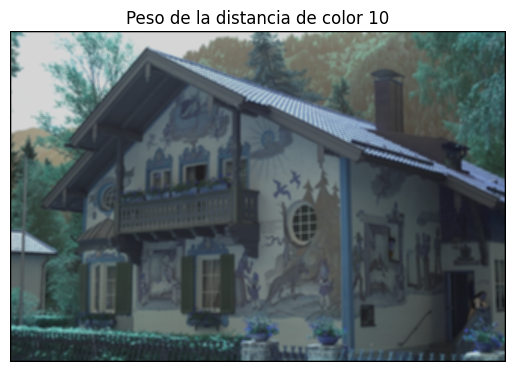

In [131]:
plt.imshow(img_smt)
plt.axis("off")
plt.title("Peso de la distancia de color 10")
plt.show()

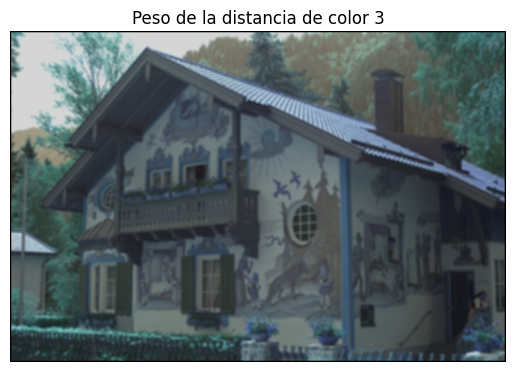

In [126]:
img = cv2.imread("img2.png")
img_norm = img.astype(float) / 255.0
img_smt = gauss_filt(img_norm, 5, 10.0, 3.0)
img_dnorm = img_smt * 255
plt.imshow(img_smt)
plt.axis("off")
plt.title("Peso de la distancia de color 3")
plt.show()

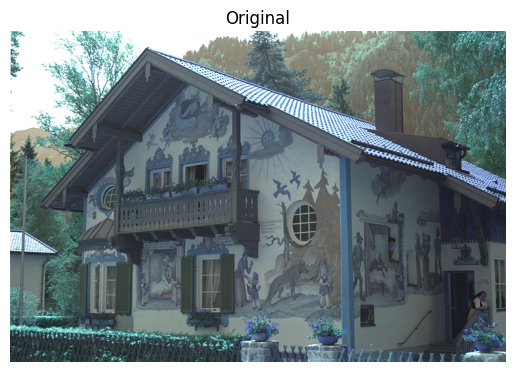

In [127]:
plt.imshow(img)
plt.axis("off")
plt.title("Original")
plt.show()

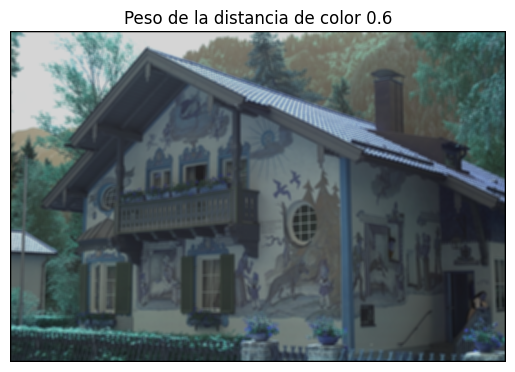

In [128]:
img = cv2.imread("img2.png")
img_norm = img.astype(float) / 255.0
img_smt = gauss_filt(img_norm, 5, 10.0, 0.6)
img_dnorm = img_smt * 255
plt.imshow(img_smt)
plt.axis("off")
plt.title("Peso de la distancia de color 0.6")
plt.show()

# Ejercicio 4

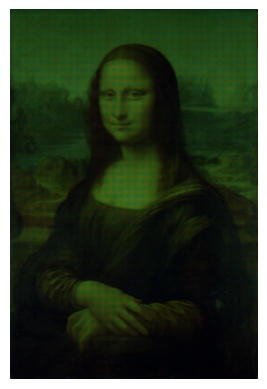

In [366]:
img = cv2.imread('img3.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [373]:
def demosaic_img(img):
    img = img.astype(float)
    imgb = img[:,:,0]
    imgg = img[:,:,1]
    imgr = img[:,:,2]
    h, k = imgg.shape
    
    # Interpolación de píxeles verdes y ajuste de píxeles rojos y azules
    for i in range(1, h-1):
        for j in range(1, k-1):
            if (i + j) % 2 == 0:  # Píxeles verdes
                if i % 2 == 0:  # Fila par
                    if j % 2 == 1:  # Píxeles verdes en posición impar de las filas pares
                        imgg[i,j] = (imgg[i-1,j] + imgg[i+1,j] + imgg[i, j-1] + imgg[i, j+1]) / 4.0
                        imgb[i,j] = (imgb[i-1,j-1] + imgb[i-1,j+1] + imgb[i+1,j-1] + imgb[i+1,j+1]) / 4.0
                    else:  # Píxeles verdes en posición par de las filas pares
                        imgg[i,j] = (imgg[i-1,j] + imgg[i+1,j] + imgg[i,j-1] + imgg[i,j+1]) / 4.0
                        imgr[i,j] = (imgr[i-1,j-1] + imgr[i-1,j+1] + imgr[i+1,j-1] + imgr[i+1,j+1]) / 4.0
                else:  # Fila impar
                    if j % 2 == 0:  # Píxeles verdes en posición par de las filas impares
                        imgg[i,j] = (imgg[i-1,j] + imgg[i+1,j] + imgg[i,j-1] + imgg[i,j+1]) / 4.0
                        imgr[i,j] = (imgr[i-1,j-1] + imgr[i-1,j+1] + imgr[i+1,j-1] + imgr[i+1,j+1]) / 4.0
                    else:  # Píxeles verdes en posición impar de las filas impares
                        imgg[i,j] = (imgg[i-1,j] + imgg[i+1,j] + imgg[i,j-1] + imgg[i,j+1]) / 4.0
                        imgb[i,j] = (imgb[i-1,j-1] + imgb[i-1,j+1] + imgb[i+1,j-1] + imgb[i+1,j+1]) / 4.0
                
    return img.astype(int)

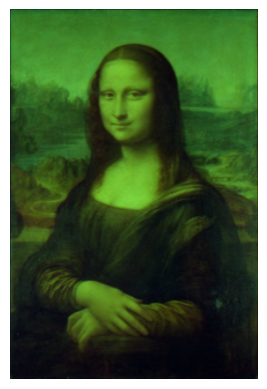

In [374]:
img_dem = demosaic_img(img)
img_dem_rgb = cv2.cvtColor(img_dem.astype('uint8'), cv2.COLOR_BGR2RGB)
plt.imshow(img_dem_rgb)
plt.axis("off")
plt.show()

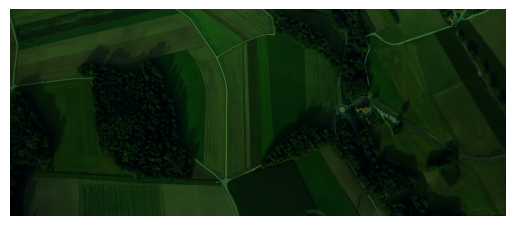

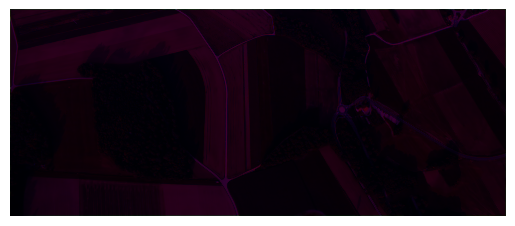

In [384]:
img = cv2.imread('img4.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()
img_dem = demosaic_img(img)
img_dem_rgb = cv2.cvtColor(img_dem.astype('uint8'), cv2.COLOR_BGR2RGB)
plt.imshow(img_dem_rgb)
plt.axis("off")
plt.show()